# 0. The function to be fitted

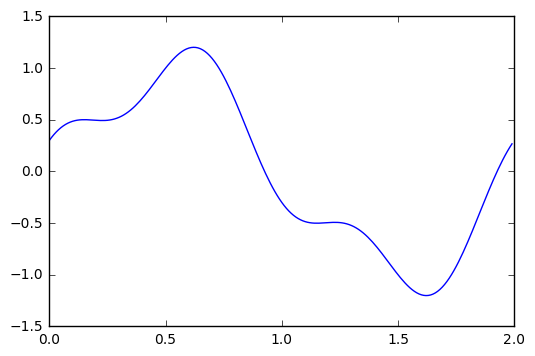

In [28]:
import math
import numpy as np
import matplotlib.pyplot as plt
X=np.arange(0,2,0.01)
Y=np.sin(math.pi*X)+0.3*np.cos(3*math.pi*X)

plt.figure()
plt.plot(X,Y)
plt.show()

# 1. Build rulebase based on data

## Fuzzify X and Y into fuzzy membership functions.

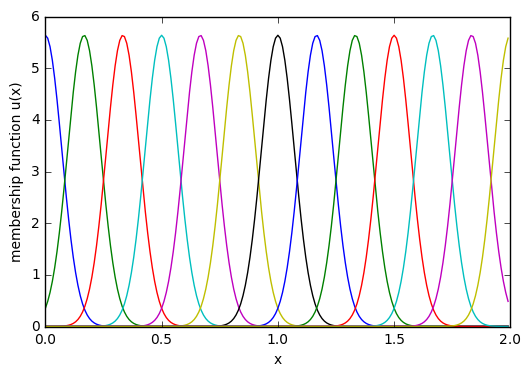

In [2]:
# The Membership function of X is based on Gaussian fuzzy

def gauss_function(x, av, sigma):
    return (1/(sigma*np.sqrt(2*math.pi)))*np.exp(-(x-av)**2/(2*sigma**2))

set_x=13 #13 rules
xmin=0
xmax=2
x_step=(xmax-xmin)/(set_x-1)
av_x=np.arange(xmin,xmax+x_step,x_step) #average value 
sigma_x=np.sqrt(-(x_step)**2/(8*math.log(0.5))) #variance

for i in range(len(av_x)):
    plt.plot(X,gauss_function(X,av_x[i],sigma_x))
plt.xlabel('x')
plt.ylabel('membership function u(x)')
plt.show()

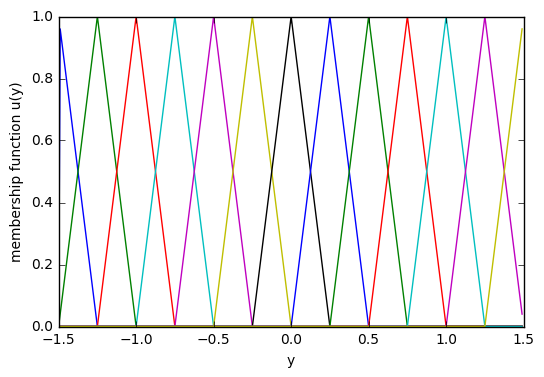

In [3]:
# The Membership function of Y is based on Triangular fuzzy

def tri_function(x,m,a):
    
    tri=[0]*len(x)
    l=m-a
    u=m+a
    for j in range(len(x)):
        x_=x[j]

        if x_<m and x_>l:
            tri[j]=(x_-l)/a
        if x_>m and x_<u:
            tri[j]=-(x_-u)/a
    return tri

set_y=13
ymin=-1.5
ymax=1.5
y_step=(ymax-ymin)/(set_y-1)
av_y=np.arange(ymin,ymax+y_step,y_step) #average value
y=np.arange(-1.5,1.5,0.01)

for i in range(len(av_y)):
    plt.plot(y,tri_function(y,av_y[i],y_step))
plt.xlabel('y')
plt.ylabel('membership function u(y)')
plt.show()

## Generating samples 

In [13]:
import pandas as pd
sample_x=X
sample_y=Y
sample_num=len(sample_x)

uxA=pd.DataFrame(np.zeros([len(sample_x),set_x]))
uyB=pd.DataFrame(np.zeros([len(sample_y),set_y]))

for s in range(set_x):
    uxA.loc[:][s]=gauss_function(sample_x,av_x[s],sigma_x)

for s in range(set_y):    
    uyB.loc[:][s]=tri_function(sample_y,av_y[s],y_step)


## Generating rules

In [27]:
WM_rule=pd.DataFrame(np.zeros([len(sample_x),3]))
for i in range(len(sample_x)):
    WM_rule.loc[i][0]=uxA.idxmax(axis=1)[i]#x fuzzy
    WM_rule.loc[i][1]=uyB.idxmax(axis=1)[i]#y fuzzy 
    #calculate the confidence level of each rule
    WM_rule.loc[i][2]=uxA.loc[i][uxA.idxmax(axis=1)[i]]*uyB.loc[i][uyB.idxmax(axis=1)[i]]
rule=pd.DataFrame()
rule_=pd.DataFrame()
for i in range(1,len(sample_x)):
    if WM_rule.loc[i-1][0]==WM_rule.loc[i][0]:
        rule_=pd.concat([rule_,WM_rule.loc[i]],axis=1) 
    else:
        #rule=pd.concat([rule,WM_rule.loc[rule_.idxmax(axis=1)[2]]],axis=1)
        rule=rule.append(WM_rule.loc[rule_.idxmax(axis=1)[2]],ignore_index=True)
        rule_=pd.DataFrame()

#rule=pd.concat([rule,WM_rule.loc[rule_.idxmax(axis=1)[2]]],axis=1)
rule=rule.append(WM_rule.loc[rule_.idxmax(axis=1)[2]],ignore_index=True)
#rule=rule.drop(2)
del rule[2]

y_value=[]
for i in range(len(av_y)):
    y_value.append(av_y[int(rule[1][i])])
rule.columns = ['x', 'y']
rule['y value']=y_value

rule.T

,0,1,2,3,4,5,6,7,8,9,10,11,12
x,0.00,1.0,2.0,3.0,4.00,5.0,6.00,7.0,8.0,9.0,10.00,11.0,12.00
y,7.00,8.0,8.0,10.0,11.00,8.0,5.00,4.0,4.0,2.0,1.00,4.0,7.00
y value,0.25,0.5,0.5,1.0,1.25,0.5,-0.25,-0.5,-0.5,-1.0,-1.25,-0.5,0.25


# 2. De-fuzzify the fuzzy output functions

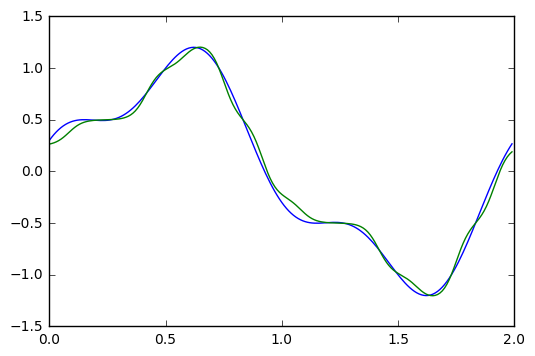

In [25]:
import math
import numpy as np
import matplotlib.pyplot as plt

defuzzy =[]

fuzzy_x=sample_x
u_fuzzyx=pd.DataFrame()
for i in range(len(av_x)):
    u_f=pd.DataFrame(gauss_function(fuzzy_x,av_x[i],sigma_x))
    u_fuzzyx=u_fuzzyx.append(u_f.T,ignore_index=True)
u_x=pd.DataFrame()
for j in range(len(sample_x)):
    u_x_=[]
    for i in range(set_x):
        u_x_.append(u_fuzzyx.loc[i][j])
    u_x=u_x.append(pd.DataFrame(u_x_).T,ignore_index=True)

for i in range(len(sample_x)):
    c1_=[x * y for x, y in zip(u_x.loc[i], rule['y value'])]
    c_ =sum(c1_)/sum(u_x.loc[i])
    defuzzy.append(c_)

plt.figure()
plt.plot(X,Y)
plt.plot(X,defuzzy)
plt.show()

reference: https://blog.csdn.net/shuoyueqishilove/article/details/71908410